# IMPORTS


In [64]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import matplotlib.pylab as plt
from mplsoccer import VerticalPitch
import matplotlib.font_manager as font_manager
pd.set_option('display.max_columns', 200)

# DATA SCRAPING


#### CHANGE PLAYER ID FROM UNDERSTAT


In [65]:
playerID = '2097'

In [66]:
URL = f"https://understat.com/player/{playerID}"

In [67]:
response = requests.get(URL)
soup = BeautifulSoup(response.content, 'lxml')
scripts = soup.find_all('script')

In [68]:
# scripts

In [69]:
#Retrieve Shots Data
shotsDataString = scripts[3].string

In [70]:
# shotsDataString

In [71]:
#Clean data and json conversion
indexStart = shotsDataString.index("('")+2
indexEnd = shotsDataString.index("')")
jsonData = shotsDataString[indexStart:indexEnd]
jsonData = jsonData.encode('utf8').decode('unicode_escape')

data = json.loads(jsonData)

In [72]:
# data

In [73]:
df = pd.json_normalize(data)

In [74]:
df

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,32522,22,MissedShots,0.7859999847412109,0.52,0.03867039829492569,Lionel Messi,h,2097,OpenPlay,2014,LeftFoot,5831,Barcelona,Elche,3,0,2014-08-24 20:00:00,Rafinha,Pass
1,32525,41,Goal,0.8619999694824219,0.615,0.06870149821043015,Lionel Messi,h,2097,OpenPlay,2014,LeftFoot,5831,Barcelona,Elche,3,0,2014-08-24 20:00:00,Sergio Busquets,BallRecovery
2,32529,62,Goal,0.86,0.435,0.15034300088882446,Lionel Messi,h,2097,OpenPlay,2014,LeftFoot,5831,Barcelona,Elche,3,0,2014-08-24 20:00:00,None,TakeOn
3,32769,3,SavedShot,0.8180000305175781,0.38,0.04550329968333244,Lionel Messi,a,2097,OpenPlay,2014,LeftFoot,5842,Villarreal,Barcelona,0,1,2014-08-31 18:00:00,Pedro,Pass
4,32773,27,SavedShot,0.8690000152587891,0.19200000762939454,0.06531669944524765,Lionel Messi,a,2097,DirectFreekick,2014,LeftFoot,5842,Villarreal,Barcelona,0,1,2014-08-31 18:00:00,None,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,530693,30,MissedShots,0.799000015258789,0.4370000076293945,0.05781928822398186,Lionel Messi,h,2097,OpenPlay,2022,LeftFoot,20024,Paris Saint Germain,Clermont Foot,2,3,2023-06-03 17:00:00,Vitinha,Pass
1458,530698,41,MissedShots,0.759000015258789,0.3579999923706055,0.05961775407195091,Lionel Messi,h,2097,DirectFreekick,2022,LeftFoot,20024,Paris Saint Germain,Clermont Foot,2,3,2023-06-03 17:00:00,None,Standard
1459,530703,53,MissedShots,0.874000015258789,0.3920000076293945,0.36908721923828125,Lionel Messi,h,2097,OpenPlay,2022,LeftFoot,20024,Paris Saint Germain,Clermont Foot,2,3,2023-06-03 17:00:00,Kylian Mbappe-Lottin,Pass
1460,530706,58,SavedShot,0.8530000305175781,0.700999984741211,0.0551636777818203,Lionel Messi,h,2097,OpenPlay,2022,LeftFoot,20024,Paris Saint Germain,Clermont Foot,2,3,2023-06-03 17:00:00,Kylian Mbappe-Lottin,TakeOn


In [75]:
df.shape

(1462, 20)

# DATA CLEANUP + VARIABLE ASSIGNMENT


In [76]:
playerName = df['player'].iloc[0]
season = df['season'].iloc[0]

In [77]:
playerName

'Lionel Messi'

In [78]:
df['result'].unique()

array(['MissedShots', 'Goal', 'SavedShot', 'BlockedShot', 'ShotOnPost'],
      dtype=object)

In [79]:
df.drop(columns=['player', 'h_a', 'player_id', 'situation', 'season', 'shotType', 'match_id', 'h_team', 'a_team', 'a_goals', 'player_assisted', 'lastAction'], inplace=True)

In [80]:
df['date'] = pd.to_datetime(df['date'])

In [81]:
df['xG'] = df['xG'].astype(float)
df['X'] = df['X'].astype(float)
df['Y'] = df['Y'].astype(float)

In [82]:
df['X'] = df['X'] * 100
df['Y'] = df['Y'] * 100

In [83]:
df

,id,minute,result,X,Y,xG,h_goals,date
0,32522,22,MissedShots,78.599998,52.000000,0.038670,3,2014-08-24 20:00:00
1,32525,41,Goal,86.199997,61.500000,0.068701,3,2014-08-24 20:00:00
2,32529,62,Goal,86.000000,43.500000,0.150343,3,2014-08-24 20:00:00
3,32769,3,SavedShot,81.800003,38.000000,0.045503,0,2014-08-31 18:00:00
4,32773,27,SavedShot,86.900002,19.200001,0.065317,0,2014-08-31 18:00:00
...,...,...,...,...,...,...,...,...
1457,530693,30,MissedShots,79.900002,43.700001,0.057819,2,2023-06-03 17:00:00
1458,530698,41,MissedShots,75.900002,35.799999,0.059618,2,2023-06-03 17:00:00
1459,530703,53,MissedShots,87.400002,39.200001,0.369087,2,2023-06-03 17:00:00
1460,530706,58,SavedShot,85.300003,70.099998,0.055164,2,2023-06-03 17:00:00


In [84]:
totalShots = df.shape[0]
totalGoals = df[df['result'] == 'Goal'].shape[0]

In [85]:
totalXG = df['xG'].sum()
XGPerShot = totalXG/totalShots

#### ASSUMING THE FIELD IS 110 M


In [86]:
averageDistance = df['X'].mean()
xDistanceMeter = 110 - (averageDistance*1.10)

In [87]:
averageDistance

84.07373458611818

# GRAPHING


In [88]:
backgroundColor = '#1a1c1f'
fontPath = './Roboto-Regular.ttf'
fontProps = font_manager.FontProperties(fname = fontPath)

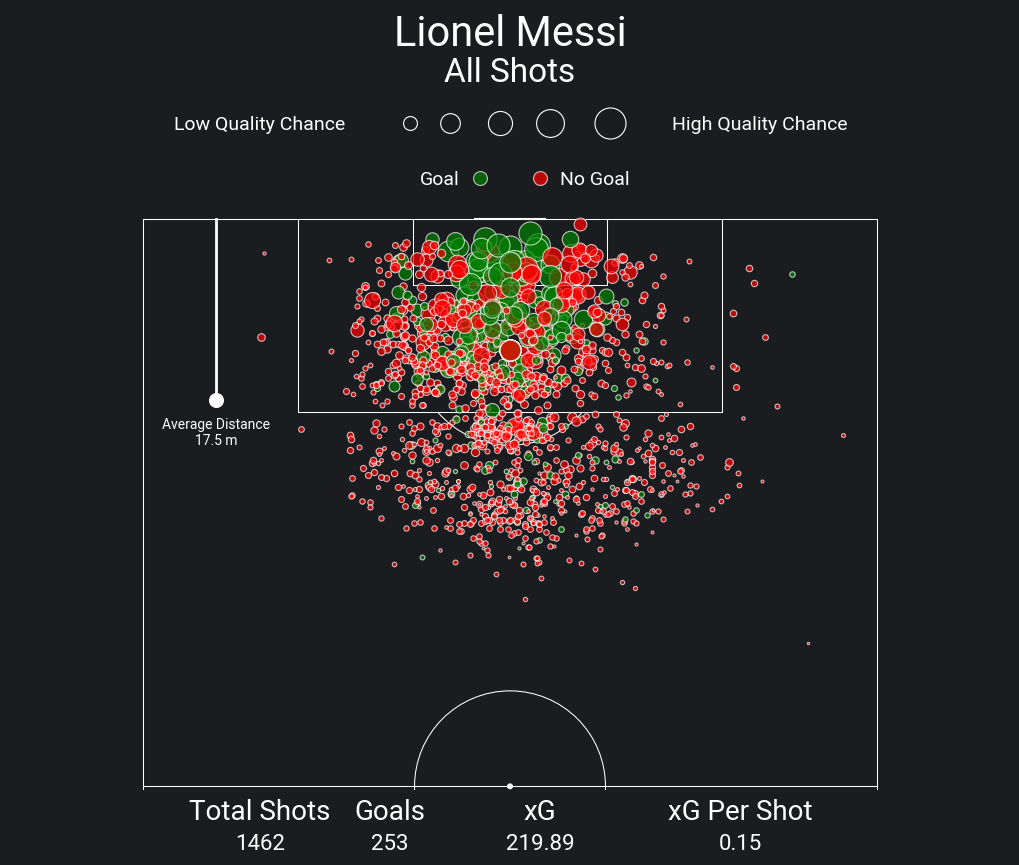

In [89]:
fig = plt.figure(figsize = (10,12))
fig.patch.set_facecolor(backgroundColor)

#CREATE 1ST BLOCK
ax1 = fig.add_axes([0, 0.7, 1, 0.2])
ax1.set_facecolor(backgroundColor)
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)

#HEADERS
ax1.text(x=0.5, y=0.85, s=playerName, fontsize=30, fontproperties=fontProps, fontweight='bold', color='white', ha='center')
ax1.text(x=0.5, y=0.70, s='All Shots', fontsize=24, fontproperties=fontProps, fontweight='bold', color='white', ha='center')

#QUALITY
ax1.text(x=0.25, y=0.50, s='Low Quality Chance', fontsize=14, fontproperties=fontProps, fontweight='bold', color='white', ha='center')
ax1.scatter(x=0.40, y=0.53, s=100, color=backgroundColor, edgecolor='white', linewidth=0.8)
ax1.scatter(x=0.44, y=0.53, s=200, color=backgroundColor, edgecolor='white', linewidth=0.8)
ax1.scatter(x=0.49, y=0.53, s=300, color=backgroundColor, edgecolor='white', linewidth=0.8)
ax1.scatter(x=0.54, y=0.53, s=400, color=backgroundColor, edgecolor='white', linewidth=0.8)
ax1.scatter(x=0.60, y=0.53, s=500, color=backgroundColor, edgecolor='white', linewidth=0.8)
ax1.text(x=0.75, y=0.50, s='High Quality Chance', fontsize=14, fontproperties=fontProps, fontweight='bold', color='white', ha='center')

#GOAL COLOR CODING
ax1.text(x=0.45, y=0.27, s='Goal', fontsize=14, fontproperties=fontProps, color='white', ha='right')
ax1.scatter(x=0.47, y=0.3, s=100, color='green', edgecolor='white', linewidth=0.8, alpha=0.7)
ax1.text(x=0.55, y=0.27, s='No Goal', fontsize=14, fontproperties=fontProps, color='white', ha='left')
ax1.scatter(x=0.53, y=0.3, s=100, color='red', edgecolor='white', linewidth=0.8, alpha=0.7)

#CREATE 2ND BLOCK
ax2 = fig.add_axes([0.05, 0.25, 0.9, 0.5])
ax2.set_facecolor(backgroundColor)

#CREATE PITCH
pitch = VerticalPitch(pitch_type='opta', half=True, pitch_color=backgroundColor, pad_bottom=0.5, line_color='white', linewidth=0.75, axis=True, label=True)
pitch.draw(ax=ax2)

#Average Distance PLot
ax2.scatter(x=90, y=averageDistance, s=100, color='white', linewidth=0.8)
ax2.plot([90,90], [100,averageDistance], color='white', linewidth=2)
ax2.text(x=90, y=averageDistance-4, s=f'Average Distance\n{xDistanceMeter:.1f} m', fontsize=10, fontproperties=fontProps, color='white', ha='center')

for x in df.to_dict(orient='records'):
    pitch.scatter(x['X'], x['Y'], s=300 * x['xG'], color='green' if x['result'] == 'Goal' else 'red', ax=ax2, alpha=0.7, linewidth=0.8, edgecolor='white')

#CREATE 3RD BLOCK
ax3 = fig.add_axes([0, 0.2, 1, 0.05])
ax3.set_facecolor(backgroundColor)
ax3.set_xlim(0,1)
ax3.set_ylim(0,1)

ax3.text(x=0.25, y=0.5, s='Total Shots', fontsize=20, fontproperties=fontProps, fontweight='bold', color='white', ha='center')
ax3.text(x=0.25, y=0, s=f'{totalShots}', fontsize=16, fontproperties=fontProps, fontweight='bold', color='white', ha='center')

ax3.text(x=0.38, y=0.5, s='Goals', fontsize=20, fontproperties=fontProps, fontweight='bold', color='white', ha='center')
ax3.text(x=0.38, y=0, s=f'{totalGoals}', fontsize=16, fontproperties=fontProps, fontweight='bold', color='white', ha='center')

ax3.text(x=0.53, y=0.5, s='xG', fontsize=20, fontproperties=fontProps, fontweight='bold', color='white', ha='center')
ax3.text(x=0.53, y=0, s=f'{totalXG:.2f}', fontsize=16, fontproperties=fontProps, fontweight='bold', color='white', ha='center')

ax3.text(x=0.73, y=0.5, s='xG Per Shot', fontsize=20, fontproperties=fontProps, fontweight='bold', color='white', ha='center')
ax3.text(x=0.73, y=0, s=f'{XGPerShot:.2f}', fontsize=16, fontproperties=fontProps, fontweight='bold', color='white', ha='center')

ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()

# FILTER BY SEASON


In [90]:
month = 6
year = 2017

In [91]:
startDate = f"{year}-{month:02d}-01"
endDate = f"{year+1}-{month:02d}-01"

In [92]:
filteredDF = df[(df['date'] >= startDate) & (df['date'] < endDate)]

In [93]:
totalShots = filteredDF.shape[0]
totalGoals = filteredDF[filteredDF['result'] == 'Goal'].shape[0]
totalXG = filteredDF['xG'].sum()
XGPerShot = totalXG/totalShots
averageDistance = filteredDF['X'].mean()
xDistanceMeter = 110 - (averageDistance*1.10)

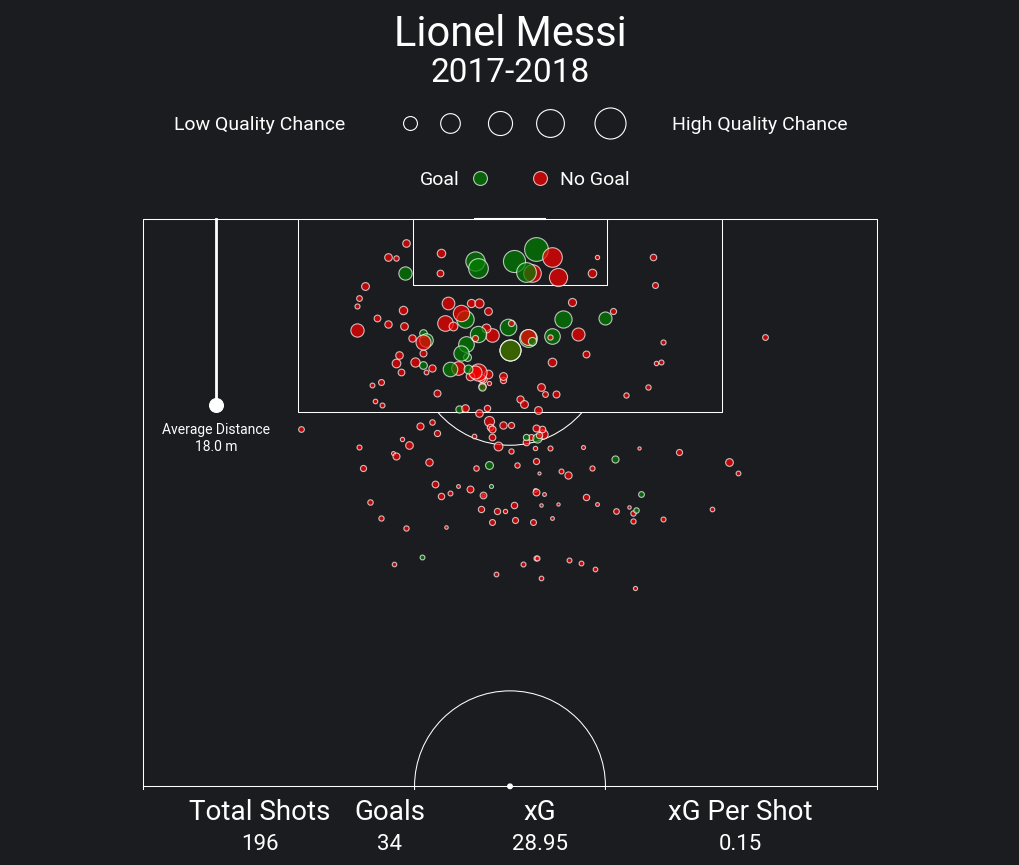

In [94]:
fig = plt.figure(figsize = (10,12))
fig.patch.set_facecolor(backgroundColor)

#CREATE 1ST BLOCK
ax1 = fig.add_axes([0, 0.7, 1, 0.2])
ax1.set_facecolor(backgroundColor)
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)

#HEADERS
ax1.text(x=0.5, y=0.85, s=playerName, fontsize=30, fontproperties=fontProps, fontweight='bold', color='white', ha='center')
ax1.text(x=0.5, y=0.70, s=f'{year}-{year+1}', fontsize=24, fontproperties=fontProps, fontweight='bold', color='white', ha='center')

#QUALITY
ax1.text(x=0.25, y=0.50, s='Low Quality Chance', fontsize=14, fontproperties=fontProps, fontweight='bold', color='white', ha='center')
ax1.scatter(x=0.40, y=0.53, s=100, color=backgroundColor, edgecolor='white', linewidth=0.8)
ax1.scatter(x=0.44, y=0.53, s=200, color=backgroundColor, edgecolor='white', linewidth=0.8)
ax1.scatter(x=0.49, y=0.53, s=300, color=backgroundColor, edgecolor='white', linewidth=0.8)
ax1.scatter(x=0.54, y=0.53, s=400, color=backgroundColor, edgecolor='white', linewidth=0.8)
ax1.scatter(x=0.60, y=0.53, s=500, color=backgroundColor, edgecolor='white', linewidth=0.8)
ax1.text(x=0.75, y=0.50, s='High Quality Chance', fontsize=14, fontproperties=fontProps, fontweight='bold', color='white', ha='center')

#GOAL COLOR CODING
ax1.text(x=0.45, y=0.27, s='Goal', fontsize=14, fontproperties=fontProps, color='white', ha='right')
ax1.scatter(x=0.47, y=0.3, s=100, color='green', edgecolor='white', linewidth=0.8, alpha=0.7)
ax1.text(x=0.55, y=0.27, s='No Goal', fontsize=14, fontproperties=fontProps, color='white', ha='left')
ax1.scatter(x=0.53, y=0.3, s=100, color='red', edgecolor='white', linewidth=0.8, alpha=0.7)

#CREATE 2ND BLOCK
ax2 = fig.add_axes([0.05, 0.25, 0.9, 0.5])
ax2.set_facecolor(backgroundColor)

#CREATE PITCH
pitch = VerticalPitch(pitch_type='opta', half=True, pitch_color=backgroundColor, pad_bottom=0.5, line_color='white', linewidth=0.75, axis=True, label=True)
pitch.draw(ax=ax2)

#Average Distance PLot
ax2.scatter(x=90, y=averageDistance, s=100, color='white', linewidth=0.8)
ax2.plot([90,90], [100,averageDistance], color='white', linewidth=2)
ax2.text(x=90, y=averageDistance-4, s=f'Average Distance\n{xDistanceMeter:.1f} m', fontsize=10, fontproperties=fontProps, color='white', ha='center')

for x in filteredDF.to_dict(orient='records'):
    pitch.scatter(x['X'], x['Y'], s=300 * x['xG'], color='green' if x['result'] == 'Goal' else 'red', ax=ax2, alpha=0.7, linewidth=0.8, edgecolor='white')

#CREATE 3RD BLOCK
ax3 = fig.add_axes([0, 0.2, 1, 0.05])
ax3.set_facecolor(backgroundColor)
ax3.set_xlim(0,1)
ax3.set_ylim(0,1)

ax3.text(x=0.25, y=0.5, s='Total Shots', fontsize=20, fontproperties=fontProps, fontweight='bold', color='white', ha='center')
ax3.text(x=0.25, y=0, s=f'{totalShots}', fontsize=16, fontproperties=fontProps, fontweight='bold', color='white', ha='center')

ax3.text(x=0.38, y=0.5, s='Goals', fontsize=20, fontproperties=fontProps, fontweight='bold', color='white', ha='center')
ax3.text(x=0.38, y=0, s=f'{totalGoals}', fontsize=16, fontproperties=fontProps, fontweight='bold', color='white', ha='center')

ax3.text(x=0.53, y=0.5, s='xG', fontsize=20, fontproperties=fontProps, fontweight='bold', color='white', ha='center')
ax3.text(x=0.53, y=0, s=f'{totalXG:.2f}', fontsize=16, fontproperties=fontProps, fontweight='bold', color='white', ha='center')

ax3.text(x=0.73, y=0.5, s='xG Per Shot', fontsize=20, fontproperties=fontProps, fontweight='bold', color='white', ha='center')
ax3.text(x=0.73, y=0, s=f'{XGPerShot:.2f}', fontsize=16, fontproperties=fontProps, fontweight='bold', color='white', ha='center')

ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()